In [167]:
# Configs

label_name = "math"
embedding_type = "perf" # time or perf

In [168]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

In [169]:
train = pd.read_csv(f"../../dataset/{embedding_type}/train_{label_name}_dataset.csv")
test = pd.read_csv(f"../../dataset/{embedding_type}/test_{label_name}_dataset.csv")

print(len(train))
print(len(test))

tt = pd.concat([train, test])

tt = pd.get_dummies(tt)

train = tt[:len(train)]
test = tt[len(train):]

train_dataset_features = train.copy().drop('label', axis=1)
train_dataset_labels = train.copy().pop('label')

test_dataset_features = test.copy().drop('label', axis=1)
test_dataset_labels = test.copy().pop('label')


4103
1846


In [170]:
print(len(train))
train.head()

4103


,branch-misses_FEATURE_CONFIG,branch-misses_INTERCEPT,branch-misses_R-VAL,branches_FEATURE_CONFIG,branches_INTERCEPT,branches_R-VAL,context-switches_FEATURE_CONFIG,context-switches_INTERCEPT,context-switches_R-VAL,cpu-migrations_FEATURE_CONFIG,...,stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POWER,task-clock_FEATURE_TYPE_FACTORIAL,task-clock_FEATURE_TYPE_FRACTIONAL_POWER,task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL,task-clock_FEATURE_TYPE_LOG_POLYNOMIAL,task-clock_FEATURE_TYPE_POLYNOMIAL,task-clock_FEATURE_TYPE_POWER
0,0.0,12176.278640,5.274472,1.0,354489.841881,31.023435,0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.8,12300.866448,140.866882,0.1,360567.282593,278.416553,0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,12396.648839,38.928139,1.0,358483.822954,81.019933,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
3,4.0,12358.582719,-0.000011,1.0,355754.502857,256.760672,0,0.0,0.0,0,...,0,0,0,1,0,1,0,0,0,0
4,1.0,12313.598463,3.715744,1.0,354852.459189,327.289900,0,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0


In [171]:
print(len(test))
test.head()

1846


,branch-misses_FEATURE_CONFIG,branch-misses_INTERCEPT,branch-misses_R-VAL,branches_FEATURE_CONFIG,branches_INTERCEPT,branches_R-VAL,context-switches_FEATURE_CONFIG,context-switches_INTERCEPT,context-switches_R-VAL,cpu-migrations_FEATURE_CONFIG,...,stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POWER,task-clock_FEATURE_TYPE_FACTORIAL,task-clock_FEATURE_TYPE_FRACTIONAL_POWER,task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL,task-clock_FEATURE_TYPE_LOG_POLYNOMIAL,task-clock_FEATURE_TYPE_POLYNOMIAL,task-clock_FEATURE_TYPE_POWER
0,1.0,12301.439320,4.881347e-01,1.0,354513.401431,895.476581,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.0,12200.347246,8.685049e-07,1.0,354554.915413,31.760188,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,12378.326531,-2.091633e+02,0.0,356091.016439,14.032866,0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,0,0
3,1.0,12268.117551,7.331861e+00,2.0,355640.314459,4.278748,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,12415.037821,4.455635e+01,1.0,357886.297991,351.576610,0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0


In [172]:
test_dataset_features.sort_index()

,branch-misses_FEATURE_CONFIG,branch-misses_INTERCEPT,branch-misses_R-VAL,branches_FEATURE_CONFIG,branches_INTERCEPT,branches_R-VAL,context-switches_FEATURE_CONFIG,context-switches_INTERCEPT,context-switches_R-VAL,cpu-migrations_FEATURE_CONFIG,...,stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POWER,task-clock_FEATURE_TYPE_FACTORIAL,task-clock_FEATURE_TYPE_FRACTIONAL_POWER,task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL,task-clock_FEATURE_TYPE_LOG_POLYNOMIAL,task-clock_FEATURE_TYPE_POLYNOMIAL,task-clock_FEATURE_TYPE_POWER
0,1.0,12301.439320,4.881347e-01,1.0,354513.401431,895.476581,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.0,12200.347246,8.685049e-07,1.0,354554.915413,31.760188,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,12378.326531,-2.091633e+02,0.0,356091.016439,14.032866,0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,0,0
3,1.0,12268.117551,7.331861e+00,2.0,355640.314459,4.278748,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,12415.037821,4.455635e+01,1.0,357886.297991,351.576610,0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,1.0,12314.822883,1.704246e+00,1.0,354975.643034,661.575731,0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1842,1.0,12311.611866,3.702682e+00,1.0,354513.610929,884.972592,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1843,0.0,12233.320504,7.522690e+01,1.0,359885.417516,2033.560625,0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
1844,1.0,12310.832756,4.590031e+00,1.0,354976.541826,664.581813,0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0


In [173]:
model = tree.DecisionTreeClassifier()
model.fit(train_dataset_features, train_dataset_labels)

DecisionTreeClassifier()

In [174]:
from graphviz import Source

graph = Source(tree.export_graphviz(model, out_file=None, feature_names=train_dataset_features.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)


'dtree_render.png'

In [175]:
confusion_matrix(train_dataset_labels, model.predict(train_dataset_features))

array([[3476,    0],
       [   0,  627]])

In [176]:
confusion_matrix(test_dataset_labels, model.predict(test_dataset_features))

array([[1443,   18],
       [ 330,   55]])

In [177]:
from sklearn.metrics import classification_report

print(classification_report(test_dataset_labels, model.predict(test_dataset_features)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1461
           1       0.75      0.14      0.24       385

    accuracy                           0.81      1846
   macro avg       0.78      0.57      0.57      1846
weighted avg       0.80      0.81      0.76      1846



In [178]:
import pybaobabdt

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 1 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)


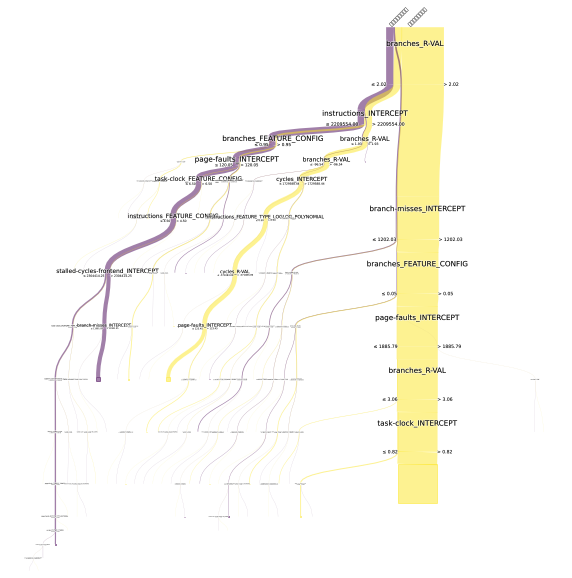

In [179]:
ax = pybaobabdt.drawTree(model, size=10, dpi=72, features=train_dataset_features.keys())

In [53]:
ax.get_figure().savefig('tree.png', format='png', dpi=300, transparent=True)